# Zad.
Pytamy się jakie są naturalne grupy w postach. Bierzemy zbiór 20newsgroups.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### wczytaj dane

In [2]:
from sklearn.datasets import fetch_20newsgroups
twenty = fetch_20newsgroups(subset='all', shuffle=True)

In [3]:
twenty.DESCR

'.. _20newsgroups_dataset:\n\nThe 20 newsgroups text dataset\n------------------------------\n\nThe 20 newsgroups dataset comprises around 18000 newsgroups posts on\n20 topics split in two subsets: one for training (or development)\nand the other one for testing (or for performance evaluation). The split\nbetween the train and test set is based upon a messages posted before\nand after a specific date.\n\nThis module contains two loaders. The first one,\n:func:`sklearn.datasets.fetch_20newsgroups`,\nreturns a list of the raw texts that can be fed to text feature\nextractors such as :class:`sklearn.feature_extraction.text.CountVectorizer`\nwith custom parameters so as to extract feature vectors.\nThe second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,\nreturns ready-to-use features, i.e., it is not necessary to use a feature\nextractor.\n\n**Data Set Characteristics:**\n\n    =================   ==========\n    Classes                     20\n    Samples total            

In [21]:
twenty.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [22]:
data = []
for j in range(len(twenty.target_names)):
    data.append([twenty.data[i] for i in range(twenty.target.shape[0]) if twenty.target[i] == j])

### Wypisz pierwszy post

In [23]:
print(data[0][0])

From: kmr4@po.CWRU.edu (Keith M. Ryan)
Subject: Re: Islam And Scientific Predictions (was Re: Genocide is Caused by Atheism)
Organization: Case Western Reserve University
Lines: 14
NNTP-Posting-Host: b64635.student.cwru.edu

In article <1993Apr19.231641.21652@monu6.cc.monash.edu.au> darice@yoyo.cc.monash.edu.au (Fred Rice) writes:

>The positive aspect of this verse noted by Dr. Maurice Bucaille is that
>while geocentrism was the commonly accepted notion at the time (and for
>a long time afterwards), there is no notion of geocentrism in this verse
>(or anywhere in the Qur'an).

	There is no notion of heliocentric, or even galacticentric either.



--------------------------------------------------------------------------------
		
		"My sole intention was learning to fly."



### Zapisz dane w dwóch zmiennych 

 * X_set
 * y_set
 
biorąc okreslona ilosc danych z kazdej klasy

5 klas po 50 elementów

In [24]:
#biore okreslona ilosc danych z kazdej klasy

categories = 5
num=50
X_set = []
Y_set =[]
for i in range(categories):
    X_set = X_set + data[i][:num]
    Y_set = Y_set + [i]*num

### wypisz pierwszy post

In [25]:
X_set[0]

'From: kmr4@po.CWRU.edu (Keith M. Ryan)\nSubject: Re: Islam And Scientific Predictions (was Re: Genocide is Caused by Atheism)\nOrganization: Case Western Reserve University\nLines: 14\nNNTP-Posting-Host: b64635.student.cwru.edu\n\nIn article <1993Apr19.231641.21652@monu6.cc.monash.edu.au> darice@yoyo.cc.monash.edu.au (Fred Rice) writes:\n\n>The positive aspect of this verse noted by Dr. Maurice Bucaille is that\n>while geocentrism was the commonly accepted notion at the time (and for\n>a long time afterwards), there is no notion of geocentrism in this verse\n>(or anywhere in the Qur\'an).\n\n\tThere is no notion of heliocentric, or even galacticentric either.\n\n\n\n--------------------------------------------------------------------------------\n\t\t\n\t\t"My sole intention was learning to fly."\n'

### wypisz pierwszy label posta

In [26]:
Y_set[0]

0

### wektoryzuje dane

In [27]:
#wektoryzuje dane

from sklearn.feature_extraction.text import CountVectorizer

tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)
X_vectors = tf_vectorizer.fit_transform(X_set)

In [28]:
print(X_vectors.shape)
print(len(Y_set))

(250, 312)
250


In [29]:
# df = pd.DataFrame(X_vectors.todense())
# df

In [30]:
np.unique(Y_set)

array([0, 1, 2, 3, 4])

# Zad. 

Wykonajmy grupowanie danych metodą hierarchiczną.

Użyj odległości:
    
   * 'euclidean'
   * 'cosine'
    
Dlaczego odległość 'euclidean' jest gorsza od 'cosine'?

In [38]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster
from sklearn import metrics

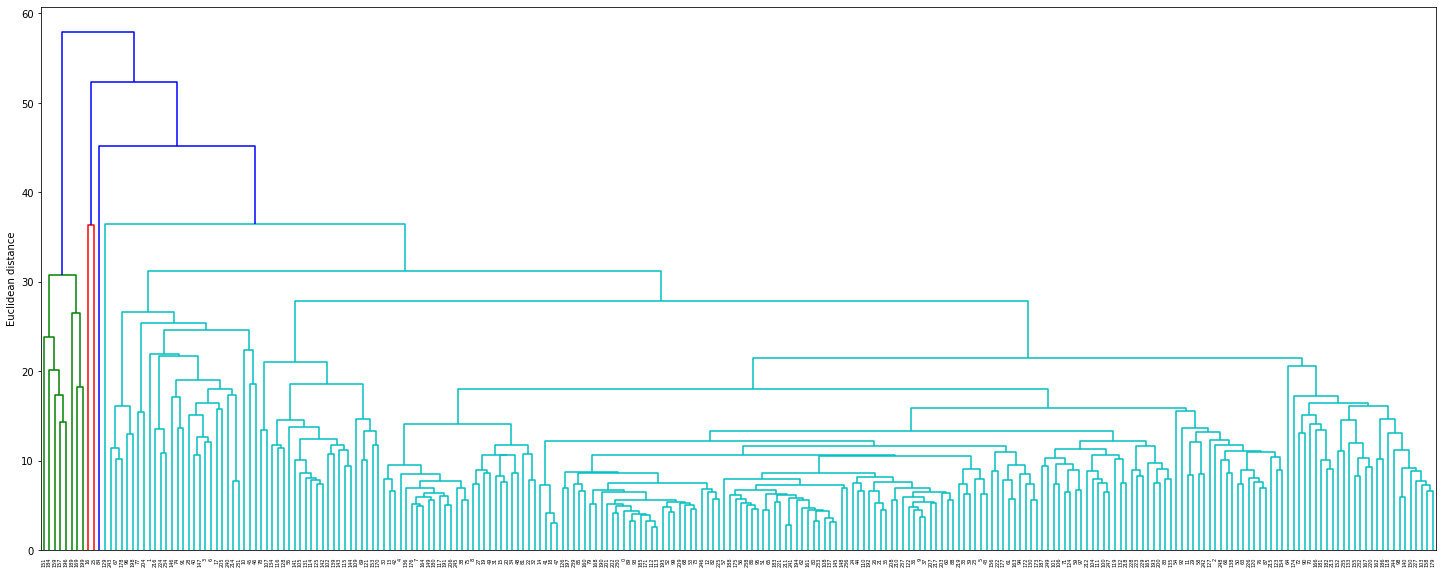

In [39]:
df = pd.DataFrame(X_vectors.todense())
df

plt.figure(figsize=(25, 10))
row_clusters = linkage(pdist(df, metric='euclidean'), method='ward') 
row_dendr = dendrogram(row_clusters)

plt.ylabel('Euclidean distance')
plt.show()


In [40]:
part = fcluster(row_clusters, 20, 'maxclust')
print(part)
print(np.unique(part))
print(metrics.adjusted_rand_score(Y_set, part))

[16 11 16 10 16 16 10 16 16 16 13 16 16 16 16 16  5 10 16 16 16 16 16 16
 16  6 16 16 10 16 16 16 16 16 16 16 16 16 16 16 10 16 16 16 16 12 12 16
 16 16 16 16 16 16 16 15 16 16 16 16 16 16 16 16 18 16 16  7 16 15 17 16
 17 16 10 16 16  8 14 16 16 16 16 16 20 16 16 16 16 16 17 10 16 16 16 16
  7 16 17 16 16 16 15 17 16 15 16 14 16 15 16 16 16 16 15 15 15 16 17 16
 16 15 16 16 16 15 16 16 15 19 16 15 16 17 15 16 16 16 16 15 17 15 15 15
 15 16 10 10 16 16 17  2 17 15 16 17 16  1 17  1 16 16 17 16 16 16 17 17
 16  3 15 16 16 16 17 16 16 16  7 17 16 17 17 16  1 16 17 16 16  4 16 16
 16 16 16 16  1 16  7  3 16 16 16 16  8 10 16 16 16 16 16 16 16 17 10 16
  9 16 16 16 17 16 16 16  9 16 16 17 16 16 16 10 17 16  9 17 16 16 16 16
 10 16 16  7 17 16 16 16 16 16]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
0.024221343327018547


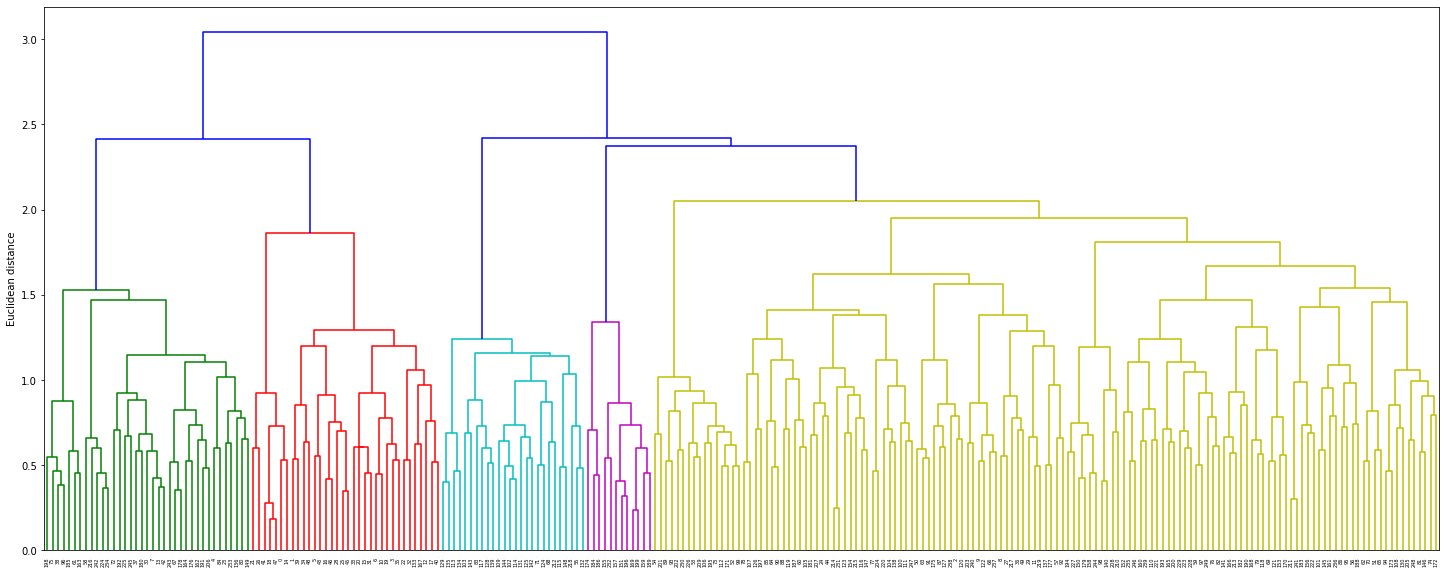

In [41]:
df = pd.DataFrame(X_vectors.todense())
df

plt.figure(figsize=(25, 10))
row_clusters = linkage(pdist(df, metric='cosine'), method='ward') 
row_dendr = dendrogram(row_clusters)

plt.ylabel('Euclidean distance')
plt.show()


In [42]:
part = fcluster(row_clusters, 20, 'maxclust')
print(part)
print(np.unique(part))
print(metrics.adjusted_rand_score(Y_set, part))

[ 4  5 11  5  3  5  5  3 13 12  5 13  5  3  4  5  5  5  4  5  5  4  5  3
 10  5  4 13  5 13  3  5  5  5  5  5 13  3  1  5  5  4  3  5 10  5  5  4
  5 13 11 19  8  8  8  6 18 13  2 15  9  1 19 11  9 19 12  3  6 16 19  6
  3  8 20  1 15 10  9 16  3 20 15  6  3  9 18 11  9  8  9 11 13  8 20 18
  1 15 14  8 10 18  6  6 10  9  8  9 20  6 15 10  8  6  6  6 10  6 16  9
 11 16 12 10  6  6  9 11  6  6 20  6  6  5  6  6  3 13 10  6 14 16  6  6
  6 18 20 10  6  3 14  7 15 16 10  7 17  7 14  7 15 18  3  1  3 15 16  5
 16  7 16  8 20 20  7 11  3 13  3 14  3 10 16 17  7  1  7  9 18  7 16  3
  3 15 14  8  7  9  1  7 15  8  8 12 10 20  3 10 14  8 14 17  6 16 10 10
  2 13  6 13 10 15 17 15  2  3  8 14 15 15  8 10  7  3  2 15 18 12 11 15
 12 17  2  3 14  3 15 10 20 15]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
0.1355214533306596


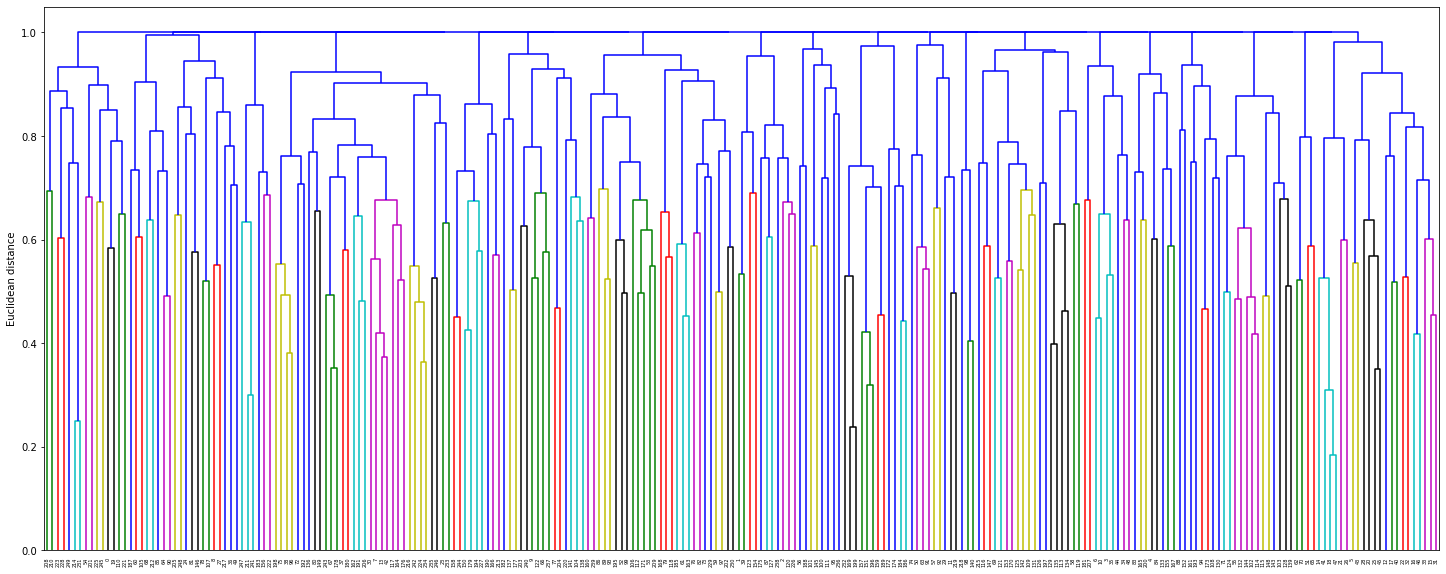

In [34]:
df = pd.DataFrame(X_vectors.todense())
df

plt.figure(figsize=(25, 10))
row_clusters = linkage(pdist(df, metric='cosine'), method='complete') 
row_dendr = dendrogram(row_clusters)

plt.ylabel('Euclidean distance')
plt.show()

part = fcluster(row_clusters, 20, 'maxclust')
print(part)
print(np.unique(part))
print(metrics.adjusted_rand_score(Y_set, part))

# Zad 
Podziel dane na grupy np. 20.

In [35]:
part = fcluster(row_clusters, 20, 'maxclust')
print(part)
print(np.unique(part))
print(metrics.adjusted_rand_score(Y_set, part))

[ 1  9  9 15 16 20 15  5  3  7 15 12 20  5 20 20 20 20 20  1 20 20 20  5
  3 20 20  3 20 12  5 20 20 20 15 15  3  5  5  9 20 20  5 20 15 20 20 20
 15  3 12 19  8  8  1 18 10 12 14  8  2  8 19 12  2 19  7  5  2 14 19 18
  5  8 12  5  8  7  3  8  5  3  8 16 16  2  8  9 17  8  2 12 12  8 17 10
  5  8 13  8 10 10 18 18  7  2  8  3 17 14  1 10  8 14 18 18 14  5  8 14
  9 14  7  9 18 14 14  9 18 14 17 14 18 16 14 14  5  7  7 18 13  7 14 18
 18 10  3 14 18  5  6 11 17 14  9 16  4 11  6 11  8 17  5  8  5 16  6 16
  8 11 14  8 11 17 11  9  5  7  5  6  5 15  7  4 11  8 11  2 10 11  6  5
  5 17  6  8 11 14  5 11 16  1  8  7  7  3  5 15  1  8  1  4  2  6  1 14
  5  3 13 12  7  1  4  1  5  1  9  6  1  8  8  1 11  5  5  5 10  7  9  8
  7  4  5  5  6  1  5  4  3  1]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


In [37]:
print(metrics.adjusted_rand_score(Y_set, part))

0.11989509919645194


In [29]:
np.unique(part, return_counts = True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20], dtype=int32),
 array([15,  8, 12,  6, 32,  9, 15, 27, 11,  8, 12,  9,  3, 19,  9,  8,  8,
        13,  4, 22], dtype=int64))

# Zad 
Wylicz średnie w każdym klastrze

In [53]:
n_elements = len(set(part))

X_dense = X_vectors.todense()
centers = np.zeros((n_elements, X_dense.shape[1]))

for i in range(1,n_elements+1):
    centers[i-1] = np.mean(X_dense[part == i], axis = 0)
print("---------------------------")
print(centers)
print("---------------------------")

---------------------------
[[0.13333333 0.         0.2        ... 0.06666667 0.06666667 0.        ]
 [0.         0.125      0.         ... 0.375      0.         0.        ]
 [0.08333333 0.08333333 0.08333333 ... 0.16666667 0.08333333 0.16666667]
 ...
 [0.         0.30769231 0.07692308 ... 0.07692308 0.         0.        ]
 [0.25       0.         0.         ... 0.         0.         0.25      ]
 [0.04545455 0.         0.31818182 ... 0.31818182 0.36363636 0.27272727]]
---------------------------


# Zad. 

Wypisujem po kilka najczęstszych słów z klastrach

In [54]:
top = 20
for i in range(n_elements):
    tops = np.argsort(centers[i,:])[-top:]#[::-1]
    print([w for w in tf_vectorizer.vocabulary_ if tf_vectorizer.vocabulary_[w] in tops])

['university', 'nntp', 'posting', 'host', 'article', 'writes', 'time', 'apple', 'like', 'good', 'just', 'note', 'don', 'hard', 'problems', 'having', 'engineering', 'number', 'software', 'machine']
['university', 'nntp', 'posting', 'host', 'article', 'writes', 'better', 'need', 'computer', 'thing', 'just', 'use', 'memory', 'bit', 'based', 'graphics', 'windows', 'running', 'image', 'uses']
['university', 'article', 'writes', 'state', 'com', 'like', 'know', 'make', 'tell', 'way', 'problem', 'life', 'file', 'don', 'help', 'want', 'read', 'memory', 'using', 'work']
['posting', 'question', 'way', 'problem', 'did', 'public', 'access', 'mail', 'help', 'want', 'thanks', 'does', 'distribution', 'world', 'mac', 'message', 'robert', 'running', 'org', 'computers']
['nntp', 'posting', 'host', 'article', 'writes', 'time', 'com', 'know', 'think', 'use', 'don', 'does', 'distribution', 'world', 'using', 'mac', 'ibm', 'color', 'card', 'port']
['university', 'nntp', 'posting', 'host', 'com', 'high', 'use'

# Zad

Wypiszmy teraz posty najbardziej reprezentujące klaster (zdania najbliższe średniej)

In [55]:

top = 1
import scipy.spatial.distance as dist

#macierz odległości zdanie-center
distances = [[dist.cosine(w,c) for w in X_dense] for c in centers] 
for i in range(n_elements):
    tops = np.argsort(distances[i])[-top:]
    for s in tops:
        print(X_set[s])
    print("-----------------------------------------------------------------------------")
#     print([w for w in tf_vectorizer.vocabulary_ if tf_vectorizer.vocabulary_[w] in tops])


# #wypiszmy teraz posty najbardziej reprezentujące klaster (zdania najbliższe średniej
# top = 2
# import scipy.spatial.distance as dist

From: Geoffrey_Hansen@mindlink.bc.ca (Geoffrey Hansen)
Subject: Re: VESA on the Speedstar 24
Organization: MIND LINK! - British Columbia, Canada
Lines: 12

Using the VMODE command, all you need to do is type VMODE VESA at the dos
prompt. VMODE is included with the Speedstar 24.  I have used the VESA mode
for autodesk animator pro.

--
   <=================================================|
             |     geoffrey_hansen@mindlink.bc.ca    |
             |=================================================>
 "Inumerable confusions and a feeling of despair invariably emerge
  in periods of great technological and cultural transition."
                                                     Marshall McLuhan


-----------------------------------------------------------------------------
From: v-cckch@microsoft.com (Kenneth Charlton)
Subject: Re: "Jump Starting" a Mac II
Organization: Microsoft Corp.
Distribution: usa
Lines: 5

Apple dealerships once had kits to replace the soldered in batteri